In [1]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
# import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle
from random import randrange

In [2]:
# from sklearn.datasets import load_digits
# digits = load_digits()

# inputX = digits.data
# inputY = digits.target
# x_subset = inputX[:1000]
# y_subset = inputY[:1000]

# tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

# plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24)

In [3]:
with open("VT_input_sep", "rb") as fp:  # Unpickling
    vt_input_sep = pickle.load(fp)
    vt_input_sep = np.array(vt_input_sep)

with open("VT_output_sep", "rb") as fp:  # Unpickling
    vt_output_sep = pickle.load(fp)
    vt_output_sep = np.array(vt_output_sep)

with open("VT_input_nosep", "rb") as fp:  # Unpickling
    vt_input_nosep = pickle.load(fp)
    vt_input_nosep = np.array(vt_input_nosep)

with open("VT_output_nosep", "rb") as fp:  # Unpickling
    vt_output_nosep = pickle.load(fp)
    vt_output_nosep = np.array(vt_output_nosep)


vt_input_sep_1 = np.mean(vt_input_sep, axis=1)
vt_output_sep_1 = np.mean(vt_output_sep, axis=1)

vt_input_nosep_1 = np.mean(vt_input_nosep, axis=1)
vt_output_nosep_1 = np.mean(vt_output_nosep, axis=1)

In [170]:
inputsep='patterns of brain activity in 6-month-old babies accurately predict which of them will be diagnosed with autism at age 2. the findings hint that brain scans may one day help doctors detect autism in infants . the study is small , and its findings need to be replicated before they can be used clinically . but researchers were nearly unanimous in their praise of the study ’ s promise for early diagnosis of autism . “this is a game-changer for the field , ” says kevin pelphrey , director of the autism and neurodevelopmental disorders institute at george washington university in washington , d.c. , who was not involved in the work . the study was published today in science translational medicine . autism features such as social problems or repetitive behaviors typically emerge around age 2 , and most children are diagnosed around age 4. knowing which infants are most likely to have autism would allow clinicians to start them on behavioral therapy while their brains are most flexible . “i think that most parents would find that really helpful and would want to know that , ” says joseph piven , thomas e. castelloe distinguished professor of psychiatry at the university of north carolina at chapel hill and one of the lead investigators of the project . the researchers looked at brain scans of ‘baby sibs ’ — children who have an older sibling with autism . baby sibs are known to have about a 20-fold increase in autism risk compared with the general population . the scans predict autism with 97 percent accuracy , the researchers found . the type of brain scan the researchers used costs several thousand dollars , but more noninvasive and affordable methods , such as electroencephalography or near-infrared spectroscopy , might one day be used in clinics . “this is a really , really important advance , ” says joy hirsch , professor of psychiatry and neuroscience at yale university , who was not involved in the study . “even though [ this story_separator_special_tag despite all the headway that science has made in understanding autism in recent years , knowing which children will one day develop autism is still almost impossible to predict . children diagnosed with autism appear to behave normally until around two , and until then there is often no indication that anything is wrong . image : nih but by scanning the brains of babies whose siblings have autism and then running the data from those scans through a machine learning algorithm , researchers say they may have come up with a method for accurately predicting which children will wind up diagnosed with autism at as young as six months . for autism researchers , this feat has long been elusive . diagnosing autism spectrum disorder before children develop symptoms could allow families to begin treatments like behavioural therapy earlier in hopes of making it more effective , as well as allowing researchers to test potential treatments , enabling them to more accurately judge whether these treatments actually work . in a paper out wednesday in science translational medicine , researchers from the university of north carolina at chapel hill and washington university school of medicine scanned the brains of 59 high-risk , six-month-old infants to examine how different regions of the brain connect and interact . at age two , after 11 of those infants had been diagnosed with autism , they scanned their brains again . after that , the researchers turned to artificial intelligence , using an algorithm that trained itself to identify patterns in brain connectivity that separated those six-month-olds who developed autism and those who did not . using deep learning , they were then able to develop a model capable of predicting which six-month-olds would eventually develop autism . using this method , researchers were able to accurately predict nine of the 11 infants who would wind up with an autism diagnosis . and it did not incorrectly predict any of the children who were not autistic . " our treatments of autism today have story_separator_special_tag predicting the future with brain imaging in a new study , emerson et al . show that brain function in infancy can be used to accurately predict which high-risk infants will later receive an autism diagnosis . using machine learning techniques that identify patterns in the brain ’ s functional connections , emerson and colleagues were able to predict with greater than 96 % accuracy whether a 6-month-old infant would develop autism at 24 months of age . these findings must be replicated , but they represent an important step toward the early identification of individuals with autism before its characteristic symptoms develop . abstract autism spectrum disorder ( asd ) is a neurodevelopmental disorder characterized by social deficits and repetitive behaviors that typically emerge by 24 months of age . to develop effective early interventions that can potentially ameliorate the defining deficits of asd and improve long-term outcomes , early detection is essential . using prospective neuroimaging of 59 6-month-old infants with a high familial risk for asd , we show that functional connectivity magnetic resonance imaging correctly identified which individual children would receive a research clinical best-estimate diagnosis of asd at 24 months of age . functional brain connections were defined in 6-month-old infants that correlated with 24-month scores on measures of social behavior , language , motor development , and repetitive behavior , which are all features common to the diagnosis of asd . a fully cross-validated machine learning algorithm applied at age 6 months had a positive predictive value of 100 % [ 95 % confidence interval ( ci ) , 62.9 to 100 ] , correctly predicting 9 of 11 infants who received a diagnosis of asd at 24 months ( sensitivity , 81.8 % ; 95 % ci , 47.8 to 96.8 ) . all 48 6-month-old infants who were not diagnosed with asd were correctly classified [ specificity , 100 % ( 95 % ci , 90.8 to 100 ) ; negative predictive value , 96.0 % ( 95 % ci , 85.1 to'

colorsep = np.zeros(shape=(1025,))
beginIndex = 0
for i, doc in enumerate(inputsep.split('story_separator_special_tag')):
    doc += ' story_separator_special_tag'
    end = beginIndex + len(doc.split()) + 1
    colorsep[beginIndex: end] = i
    # print(beginIndex, end)
    beginIndex = end

colornosep = np.zeros(shape=(1023,))
beginIndex = 0
for i, doc in enumerate(inputsep.split('story_separator_special_tag')):
    end = beginIndex + len(doc.split()) + 1
    colornosep[beginIndex: end] = i
    # print(beginIndex, end)
    beginIndex = end

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
vt_output_sep_1 = pca.fit_transform(vt_output_sep_1)
vt_output_nosep_1 = pca.fit_transform(vt_output_nosep_1)

In [10]:
perplexity = 30
learning_rate=100
# early_exaggeration=5

tsne_inp_sep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(vt_input_sep_1)
tsne_out_sep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(vt_output_sep_1)

tsne_inp_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(vt_input_nosep_1)
tsne_out_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(vt_output_nosep_1)

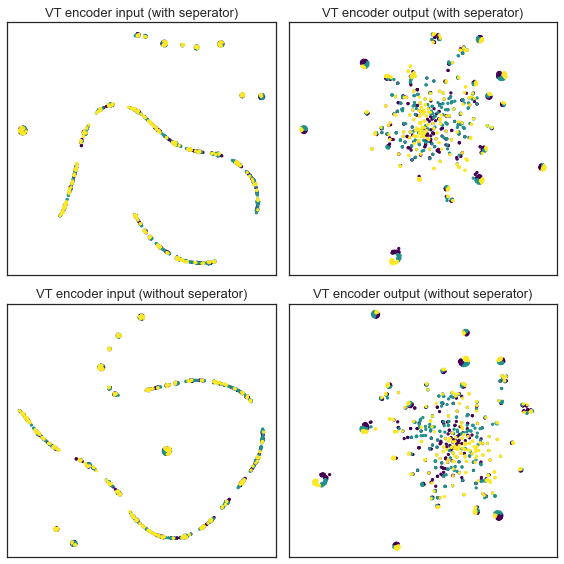

In [171]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8,8))
cmap = 'viridis'
ax1[0].scatter(tsne_inp_sep[:, 0], tsne_inp_sep[:, 1], s=5 ,c=colorsep, cmap=cmap)
ax1[0].set_title('VT encoder input (with seperator)', fontsize=13)

ax1[1].scatter(tsne_out_sep[:, 0], tsne_out_sep[:, 1], s=5 ,c=colorsep, cmap=cmap)
ax1[1].set_title('VT encoder output (with seperator)', fontsize=13)

ax2[0].scatter(tsne_inp_nosep[:, 0], tsne_inp_nosep[:, 1], s=5 ,c=colornosep, cmap=cmap)
ax2[0].set_title('VT encoder input (without seperator)', fontsize=13)

ax2[1].scatter(tsne_out_nosep[:, 0], tsne_out_nosep[:, 1], s=5 ,c=colornosep, cmap=cmap)
ax2[1].set_title('VT encoder output (without seperator)', fontsize=13)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.gca().set_aspect('equal', 'datalim')
plt.tight_layout()
plt.savefig('vt.svg', pad_inches=0)

In [340]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')

# pca_tsne2 = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=5, n_iter=1000).fit_transform(before_1)
# ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 15, c=color, cmap='Spectral')
# plt.title('VT with sep encoder input', fontsize=24)
# plt.xlim(-30, 30)
# plt.ylim(-30, 30)
# ax.set_zlim(-40,40)
# plt.show()

In [12]:
with open("CT_input_sep", "rb") as fp:  # Unpickling
    ct_input_sep = pickle.load(fp)
    ct_input_sep = np.array(ct_input_sep)

with open("CT_output_sep", "rb") as fp:  # Unpickling
    ct_output_sep = pickle.load(fp)
    ct_output_sep = np.array(ct_output_sep)

with open("CT_input_nosep", "rb") as fp:  # Unpickling
    ct_input_nosep = pickle.load(fp)
    ct_input_nosep = np.array(ct_input_nosep)

with open("CT_output_nosep", "rb") as fp:  # Unpickling
    ct_output_nosep = pickle.load(fp)
    ct_output_nosep = np.array(ct_output_nosep)

ct_input_sep_1 = np.mean(ct_input_sep, axis=1)
ct_output_sep_1 = np.mean(ct_output_sep, axis=1)

ct_input_nosep_1 = np.mean(ct_input_nosep, axis=1)
ct_output_nosep_1 = np.mean(ct_output_nosep, axis=1)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
ct_output_sep_1 = pca.fit_transform(ct_output_sep_1)
ct_output_nosep_1 = pca.fit_transform(ct_output_nosep_1)

In [14]:
perplexity = 30
learning_rate=100
# early_exaggeration=5

tsne_ct_inp_sep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ct_input_sep_1)
tsne_ct_out_sep = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ct_output_sep_1)

tsne_ct_inp_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ct_input_nosep_1)
tsne_ct_out_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ct_output_nosep_1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1025 samples in 0.000s...
[t-SNE] Computed neighbors for 1025 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1025
[t-SNE] Computed conditional probabilities for sample 1025 / 1025
[t-SNE] Mean sigma: 13.134857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.885727
[t-SNE] KL divergence after 4100 iterations: 0.674435


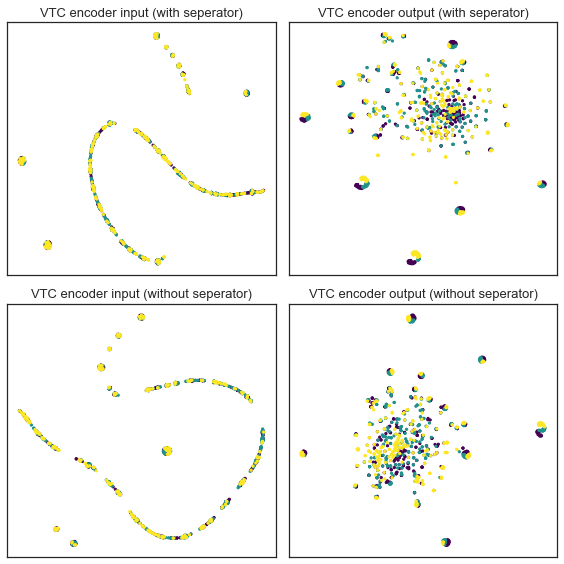

In [172]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8,8))
cmap = 'viridis'
ax1[0].scatter(tsne_ct_inp_sep[:, 0], tsne_ct_inp_sep[:, 1], s=5 ,c=colorsep, cmap=cmap)
ax1[0].set_title('VTC encoder input (with seperator)', fontsize=13)

ax1[1].scatter(tsne_ct_out_sep[:, 0], tsne_ct_out_sep[:, 1], s=5 ,c=colorsep, cmap=cmap)
ax1[1].set_title('VTC encoder output (with seperator)', fontsize=13)

ax2[0].scatter(tsne_ct_inp_nosep[:, 0], tsne_ct_inp_nosep[:, 1], s=5 ,c=colornosep, cmap=cmap)
ax2[0].set_title('VTC encoder input (without seperator)', fontsize=13)

ax2[1].scatter(tsne_ct_out_nosep[:, 0], tsne_ct_out_nosep[:, 1], s=5 ,c=colornosep, cmap=cmap)
ax2[1].set_title('VTC encoder output (without seperator)', fontsize=13)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
# plt.gca().set_aspect('equal', 'datalim')
plt.tight_layout()
plt.savefig('vtc.svg', pad_inches=0)

In [111]:
with open("HT_input_sep", "rb") as fp:  # Unpickling
    ht_input_sep = pickle.load(fp)
    ht_input_sep = np.array(ht_input_sep)

with open("HT_output_sep", "rb") as fp:  # Unpickling
    ht_output_sep = pickle.load(fp)
    ht_output_sep = np.array(ht_output_sep)

with open("HT_input_nosep", "rb") as fp:  # Unpickling
    ht_input_nosep = pickle.load(fp)
    ht_input_nosep = np.array(ht_input_nosep)

with open("HT_output_nosep", "rb") as fp:  # Unpickling
    ht_output_nosep = pickle.load(fp)
    ht_output_nosep = np.array(ht_output_nosep)

ht_input_sep_1 = ht_input_sep.flatten().reshape(1,-1) #np.mean(ht_input_sep.flatten(), axis=1)
ht_output_sep_1 = np.mean(ht_output_sep, axis=1)

ht_input_nosep_1 = np.mean(ht_input_nosep, axis=1)
ht_output_nosep_1 = np.mean(ht_output_nosep, axis=1)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
ht_output_sep_1 = pca.fit_transform(ht_output_sep_1)
ht_output_nosep_1 = pca.fit_transform(ht_output_nosep_1)

In [159]:
print(ht_input_sep_1.shape, ht_output_sep_1.shape)

(1, 1236) (1172, 50)


In [168]:
inputsep='patterns of brain activity in 6-month-old babies accurately predict which of them will be diagnosed with autism at age 2. the findings hint that brain scans may one day help doctors detect autism in infants . the study is small , and its findings need to be replicated before they can be used clinically . but researchers were nearly unanimous in their praise of the study ’ s promise for early diagnosis of autism . “this is a game-changer for the field , ” says kevin pelphrey , director of the autism and neurodevelopmental disorders institute at george washington university in washington , d.c. , who was not involved in the work . the study was published today in science translational medicine . autism features such as social problems or repetitive behaviors typically emerge around age 2 , and most children are diagnosed around age 4. knowing which infants are most likely to have autism would allow clinicians to start them on behavioral therapy while their brains are most flexible . “i think that most parents would find that really helpful and would want to know that , ” says joseph piven , thomas e. castelloe distinguished professor of psychiatry at the university of north carolina at chapel hill and one of the lead investigators of the project . the researchers looked at brain scans of  ⁇ baby sibs ’ — children who have an older sibling with autism . baby sibs are known to have about a 20-fold increase in autism risk compared with the general population . the scans predict autism with 97 percent accuracy , the researchers found . the type of brain scan the researchers used costs several thousand dollars , but more noninvasive and affordable methods , such as electroencephalography or near-infrared spectroscopy , might one day be used in clinics . “this is a really , really important advance , ” says joy hirsch , professor of psychiatry and neuroscience at yale university , who was not involved in the study . “even though  ⁇  this ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>despite all the headway that science has made in understanding autism in recent years , knowing which children will one day develop autism is still almost impossible to predict . children diagnosed with autism appear to behave normally until around two , and until then there is often no indication that anything is wrong . image : nih but by scanning the brains of babies whose siblings have autism and then running the data from those scans through a machine learning algorithm , researchers say they may have come up with a method for accurately predicting which children will wind up diagnosed with autism at as young as six months . for autism researchers , this feat has long been elusive . diagnosing autism spectrum disorder before children develop symptoms could allow families to begin treatments like behavioural therapy earlier in hopes of making it more effective , as well as allowing researchers to test potential treatments , enabling them to more accurately judge whether these treatments actually work . in a paper out wednesday in science translational medicine , researchers from the university of north carolina at chapel hill and washington university school of medicine scanned the brains of 59 high-risk , six-month-old infants to examine how different regions of the brain connect and interact . at age two , after 11 of those infants had been diagnosed with autism , they scanned their brains again . after that , the researchers turned to artificial intelligence , using an algorithm that trained itself to identify patterns in brain connectivity that separated those six-month-olds who developed autism and those who did not . using deep learning , they were then able to develop a model capable of predicting which six-month-olds would eventually develop autism . using this method , researchers were able to accurately predict nine of the 11 infants who would wind up with an autism diagnosis . and it did not incorrectly predict any of the children who were not autistic . " our treatments of autism today have ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ <PARA>predicting the future with brain imaging in a new study , emerson et al . show that brain function in infancy can be used to accurately predict which high-risk infants will later receive an autism diagnosis . using machine learning techniques that identify patterns in the brain ’ s functional connections , emerson and colleagues were able to predict with greater than 96 % accuracy whether a 6-month-old infant would develop autism at 24 months of age . these findings must be replicated , but they represent an important step toward the early identification of individuals with autism before its characteristic symptoms develop . abstract autism spectrum disorder ( asd ) is a neurodevelopmental disorder characterized by social deficits and repetitive behaviors that typically emerge by 24 months of age . to develop effective early interventions that can potentially ameliorate the defining deficits of asd and improve long-term outcomes , early detection is essential . using prospective neuroimaging of 59 6-month-old infants with a high familial risk for asd , we show that functional connectivity magnetic resonance imaging correctly identified which individual children would receive a research clinical best-estimate diagnosis of asd at 24 months of age . functional brain connections were defined in 6-month-old infants that correlated with 24-month scores on measures of social behavior , language , motor development , and repetitive behavior , which are all features common to the diagnosis of asd . a fully cross-validated machine learning algorithm applied at age 6 months had a positive predictive value of 100 %  ⁇  95 % confidence interval ( ci ) , 62.9 to 100  ⁇  , correctly predicting 9 of 11 infants who received a diagnosis of asd at 24 months ( sensitivity , 81.8 % ; 95 % ci , 47.8 to 96.8 ) . all 48 6-month-old infants who were not diagnosed with asd were correctly classified  ⁇  specificity , 100 % ( 95 % ci , 90.8 to 100 ) ; negative predictive value , 96.0 % ( 95 % ci , 85.1 to'
inputnosep='patterns of brain activity in 6-month-old babies accurately predict which of them will be diagnosed with autism at age 2. the findings hint that brain scans may one day help doctors detect autism in infants . the study is small , and its findings need to be replicated before they can be used clinically . but researchers were nearly unanimous in their praise of the study ’ s promise for early diagnosis of autism . “this is a game-changer for the field , ” says kevin pelphrey , director of the autism and neurodevelopmental disorders institute at george washington university in washington , d.c. , who was not involved in the work . the study was published today in science translational medicine . autism features such as social problems or repetitive behaviors typically emerge around age 2 , and most children are diagnosed around age 4. knowing which infants are most likely to have autism would allow clinicians to start them on behavioral therapy while their brains are most flexible . “i think that most parents would find that really helpful and would want to know that , ” says joseph piven , thomas e. castelloe distinguished professor of psychiatry at the university of north carolina at chapel hill and one of the lead investigators of the project . the researchers looked at brain scans of  ⁇ baby sibs ’ — children who have an older sibling with autism . baby sibs are known to have about a 20-fold increase in autism risk compared with the general population . the scans predict autism with 97 percent accuracy , the researchers found . the type of brain scan the researchers used costs several thousand dollars , but more noninvasive and affordable methods , such as electroencephalography or near-infrared spectroscopy , might one day be used in clinics . “this is a really , really important advance , ” says joy hirsch , professor of psychiatry and neuroscience at yale university , who was not involved in the study . “even though  ⁇  this <PARA>despite all the headway that science has made in understanding autism in recent years , knowing which children will one day develop autism is still almost impossible to predict . children diagnosed with autism appear to behave normally until around two , and until then there is often no indication that anything is wrong . image : nih but by scanning the brains of babies whose siblings have autism and then running the data from those scans through a machine learning algorithm , researchers say they may have come up with a method for accurately predicting which children will wind up diagnosed with autism at as young as six months . for autism researchers , this feat has long been elusive . diagnosing autism spectrum disorder before children develop symptoms could allow families to begin treatments like behavioural therapy earlier in hopes of making it more effective , as well as allowing researchers to test potential treatments , enabling them to more accurately judge whether these treatments actually work . in a paper out wednesday in science translational medicine , researchers from the university of north carolina at chapel hill and washington university school of medicine scanned the brains of 59 high-risk , six-month-old infants to examine how different regions of the brain connect and interact . at age two , after 11 of those infants had been diagnosed with autism , they scanned their brains again . after that , the researchers turned to artificial intelligence , using an algorithm that trained itself to identify patterns in brain connectivity that separated those six-month-olds who developed autism and those who did not . using deep learning , they were then able to develop a model capable of predicting which six-month-olds would eventually develop autism . using this method , researchers were able to accurately predict nine of the 11 infants who would wind up with an autism diagnosis . and it did not incorrectly predict any of the children who were not autistic . " our treatments of autism today have <PARA>predicting the future with brain imaging in a new study , emerson et al . show that brain function in infancy can be used to accurately predict which high-risk infants will later receive an autism diagnosis . using machine learning techniques that identify patterns in the brain ’ s functional connections , emerson and colleagues were able to predict with greater than 96 % accuracy whether a 6-month-old infant would develop autism at 24 months of age . these findings must be replicated , but they represent an important step toward the early identification of individuals with autism before its characteristic symptoms develop . abstract autism spectrum disorder ( asd ) is a neurodevelopmental disorder characterized by social deficits and repetitive behaviors that typically emerge by 24 months of age . to develop effective early interventions that can potentially ameliorate the defining deficits of asd and improve long-term outcomes , early detection is essential . using prospective neuroimaging of 59 6-month-old infants with a high familial risk for asd , we show that functional connectivity magnetic resonance imaging correctly identified which individual children would receive a research clinical best-estimate diagnosis of asd at 24 months of age . functional brain connections were defined in 6-month-old infants that correlated with 24-month scores on measures of social behavior , language , motor development , and repetitive behavior , which are all features common to the diagnosis of asd . a fully cross-validated machine learning algorithm applied at age 6 months had a positive predictive value of 100 %  ⁇  95 % confidence interval ( ci ) , 62.9 to 100  ⁇  , correctly predicting 9 of 11 infants who received a diagnosis of asd at 24 months ( sensitivity , 81.8 % ; 95 % ci , 47.8 to 96.8 ) . all 48 6-month-old infants who were not diagnosed with asd were correctly classified  ⁇  specificity , 100 % ( 95 % ci , 90.8 to 100 ) ; negative predictive value , 96.0 % ( 95 % ci , 85.1 to'
# print(inputsep.split())

colorsepht = np.zeros(shape=(1236,))
beginIndex = 0
for i, doc in enumerate(inputsep.split('<PARA>')):
    doc += ' story_separator_special_tag'
    end = beginIndex + len(doc.split()) + 1
    colorsepht[beginIndex: end] = i
    # print(beginIndex, end)
    beginIndex = end

colornosepht = np.zeros(shape=(1177,))
beginIndex = 0
for i, doc in enumerate(inputnosep.split('<PARA>')):
    end = beginIndex + len(doc.split()) + 1
    colornosepht[beginIndex: end] = i
    # print(beginIndex, end)
    beginIndex = end

In [131]:
perplexity = 30
learning_rate=100
# early_exaggeration=5

tsne_ht_inp_sep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ht_input_sep_1.T)
tsne_ht_out_sep = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ht_output_sep_1)

tsne_ht_inp_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ht_input_nosep_1.T)
tsne_ht_out_nosep = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=5000, learning_rate=learning_rate).fit_transform(ht_output_nosep_1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1172 samples in 0.001s...
[t-SNE] Computed neighbors for 1172 samples in 0.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1172
[t-SNE] Computed conditional probabilities for sample 1172 / 1172
[t-SNE] Mean sigma: 0.728245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.395767
[t-SNE] KL divergence after 4500 iterations: 0.593455


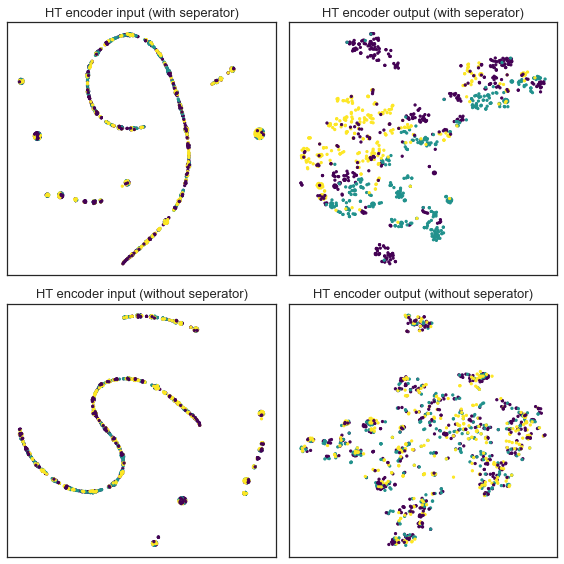

In [173]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8,8))
cmap = 'viridis'
ax1[0].scatter(tsne_ht_inp_sep[:, 0], tsne_ht_inp_sep[:, 1], s=5 ,c=colorsepht, cmap=cmap)
ax1[0].set_title('HT encoder input (with seperator)', fontsize=13)

ax1[1].scatter(tsne_ht_out_sep[:, 0], tsne_ht_out_sep[:, 1], s=5 ,c=colorsepht[:1172], cmap=cmap)
ax1[1].set_title('HT encoder output (with seperator)', fontsize=13)

ax2[0].scatter(tsne_ht_inp_nosep[:, 0], tsne_ht_inp_nosep[:, 1], s=5 ,c=colornosepht, cmap=cmap)
ax2[0].set_title('HT encoder input (without seperator)', fontsize=13)

ax2[1].scatter(tsne_ht_out_nosep[:, 0], tsne_ht_out_nosep[:, 1], s=5 ,c=colornosepht[:1172], cmap=cmap)
ax2[1].set_title('HT encoder output (without seperator)', fontsize=13)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
# plt.gca().set_aspect('equal', 'datalim')
plt.tight_layout()
plt.savefig('ht.svg', pad_inches=0)

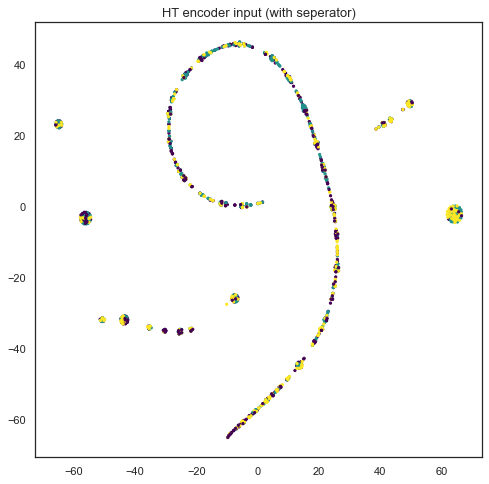

In [179]:
# fig, ax = plt.subplots(1, 1, figsize=(8,8))
# ax.scatter(tsne_ht_inp_sep[:, 0], tsne_ht_inp_sep[:, 1], s=5 ,c=colorsepht, cmap=cmap)
# ax.set_title('HT encoder input (with seperator)', fontsize=13)
# plt.savefig('ht1.svg', pad_inches=0)